# Overarching aims of the exercises this week

This week, you will implement the entire feed-forward pass of a neural network! Next week you will compute the gradient of the network by implementing back-propagation manually, and by using autograd which does back-propagation for you (much easier!). Next week, you will also use the gradient to optimize the network with a gradient method! However, there is an optional exercise this week to get started on training the network and getting good results!

We recommend that you do the exercises this week by editing and running this notebook file, as it includes some checks along the way that you have implemented the pieces of the feed-forward pass correctly, and running small parts of the code at a time will be important for understanding the methods.

If you have trouble running a notebook, you can run this notebook in google colab instead (https://colab.research.google.com/drive/1zKibVQf-iAYaAn2-GlKfgRjHtLnPlBX4#offline=true&sandboxMode=true), an updated link will be provided on the course discord (you can also send an email to k.h.fredly@fys.uio.no if you encounter any trouble), though we recommend that you set up VSCode and your python environment to run code like this locally.

First, here are some functions you are going to need, don't change this cell. If you are unable to import autograd, just swap in normal numpy until you want to do the final optional exercise.


In [9]:
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Defining some activation functions
def ReLU(z):
    return np.where(z > 0, z, 0)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=0))
    return e_z / np.sum(e_z, axis=1)[:, np.newaxis]


def softmax_vec(z):
    """Compute softmax values for each set of scores in the vector z.
    Use this function when you use the activation function on one vector at a time"""
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

# Exercise 1

In this exercise you will compute the activation of the first layer. You only need to change the code in the cells right below an exercise, the rest works out of the box. Feel free to make changes and see how stuff works though!


In [10]:
np.random.seed(2024)

x = np.random.randn(2)  # network input. This is a single input with two features
W1 = np.random.randn(4, 2)  # first layer weights

b1 = np.random.randn(4)  #for correct randn


**a)** Given the shape of the first layer weight matrix, what is the input shape of the neural network? What is the output shape of the first layer?


Given a two-layer neural network:

$$f(\mathbf{x}_i) = g\left(b_0 + \sum_{m=1}^{M} w_m^{(2)} \sigma\left(\sum_{j=1}^{p} w_{jm}^{(1)} x_{ij} + b_m^{(1)}\right)\right)$$

Matrix notation:

$$f(\mathbf{x}_i) = g(b_0 + \mathbf{w}^{(2)T} \sigma(\mathbf{W}^{(1)T} \mathbf{x}_i + \mathbf{b}^{(1)}))$$

wherein $\sigma$ and $g$ are some chosen (nonlinear) activation and output functions.

$$\mathbf{x} \in \mathbb{R}^2, \quad W^{(1)} \in \mathbb{R}^{4 \times 2}$$

which in matrix form:

$$\begin{bmatrix} w^{(1)}_{11} & w^{(1)}_{21} \\ w^{(1)}_{12} & w^{(1)}_{22} \\ w^{(1)}_{13} & w^{(1)}_{23} \\ w^{(1)}_{14} & w^{(1)}_{24} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} w^{(1)}_{11}x_1 + w^{(1)}_{21}x_2 \\ w^{(1)}_{12}x_1 + w^{(1)}_{22}x_2 \\ w^{(1)}_{13}x_1 + w^{(1)}_{23}x_2 \\ w^{(1)}_{14}x_1 + w^{(1)}_{24}x_2 \end{bmatrix}$$



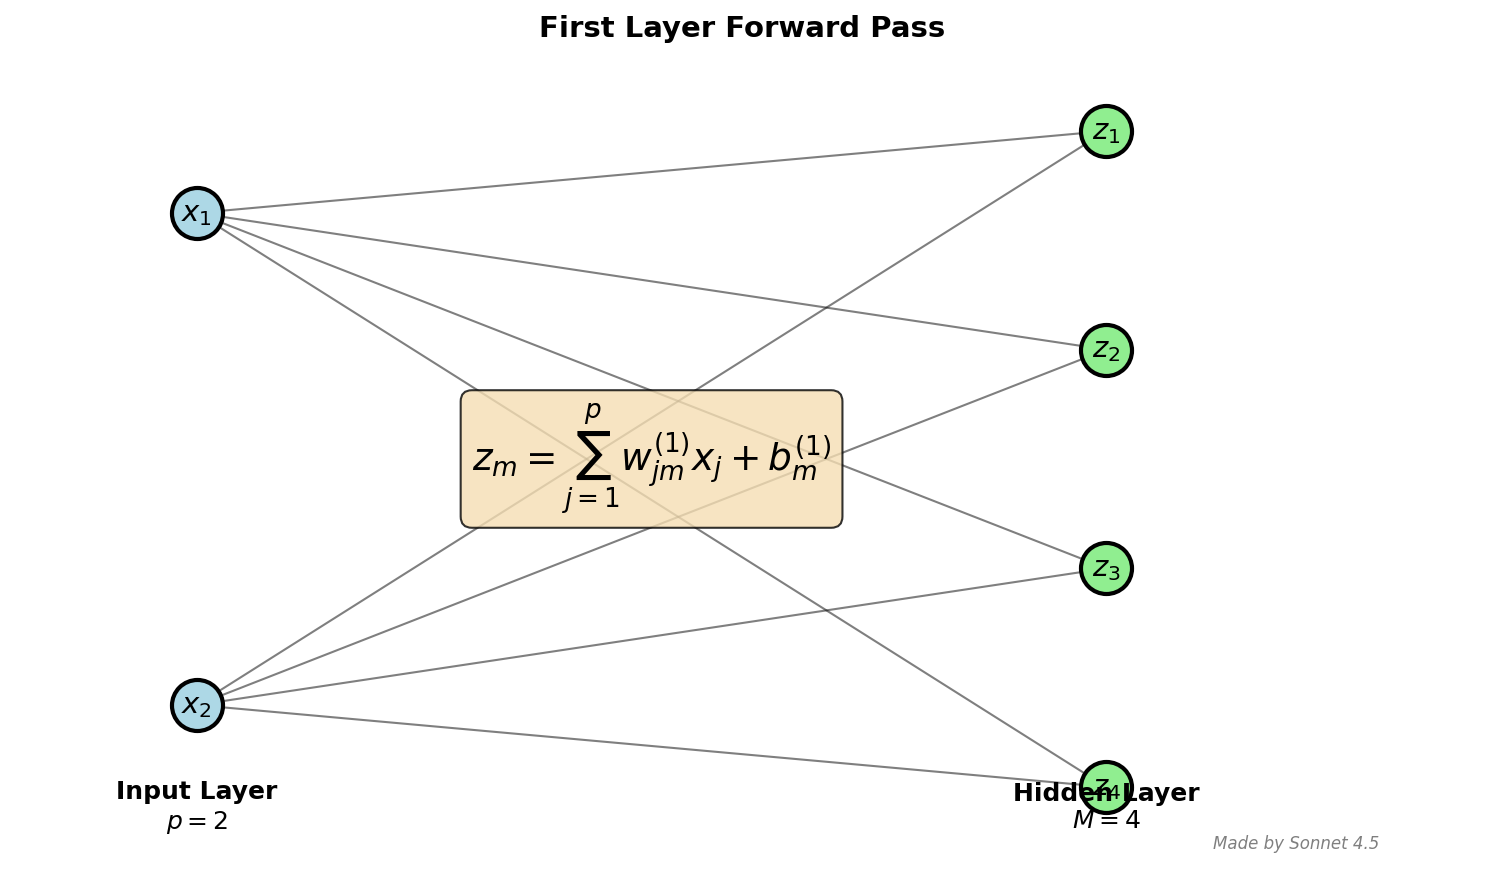

In [11]:
#made by sonnet 4.5
from IPython.display import Image, display
display(Image('plot1_first_layer.png'))


At first glance we can see

$$
z_1 = \sum_{j = 1}^p w^{(1)}_{j1}x_j + b^{(1)}_1 \quad \quad  z_1 = w_{11}^{(1)} + w_{21}^{(1)}x_2 + b^{(1)}_1
$$
and
$$
 z_2 = \sum_{j = 1}^p w^{(1)}_{j2}x_j + b^{(1)}_2 \quad \quad  z_2 = w_{12}^{(1)}x_1 + w_{22}^{(1)}x_2 + b^{(1)}_2 
$$

and so on. So, since:

In [12]:
print(f"x = {x}")
print(f"w(1) = {W1}")

x = [1.66804732 0.73734773]
w(1) = [[-0.20153776 -0.15091195]
 [ 0.91605181  1.16032964]
 [-2.619962   -1.32529457]
 [ 0.45998862  0.10205165]]


We can write in matrix form:

$$
\begin{bmatrix} z_1 \\ z_2 \\ z_3 \\ z_4 \end{bmatrix} = \begin{bmatrix} -0.20 & -0.15 \\ 0.92 & 1.16 \\ -2.62 & -1.33 \\ 0.46 & 0.10 \end{bmatrix} \begin{bmatrix} 1.67 \\ 0.74 \end{bmatrix} + \begin{bmatrix} b_1^{(1)} \\ b_2^{(1)} \\ b_3^{(1)} \\ b_4^{(1)} \end{bmatrix}
$$

and see that we have 2 input dimensions, 4 output dimensions. 

**b)** Define the bias of the first layer, `b1`with the correct shape. (Run the next cell right after the previous to get the random generated values to line up with the test solution below)


In [13]:
print(b1)

[ 1.05355278  1.62404261 -1.50063502 -0.27783169]


**c)** Compute the intermediary `z1` for the first layer


As we saw: 

$$
z_1 = \sum_{j = 1}^p w^{(1)}_{j1}x_j + b^{(1)}_1 \quad \quad  z_1 = w_{11}^{(1)}x_1 + w_{21}^{(1)}x_2 + b^{(1)}_1
$$


In [14]:
#example loop for insight
p  = len(x)
z_11 = 0
for j in range(p): 
    z_11 += W1[0, j]*x[j]
z_11 = z_11 + b1[0]
print(z_11)

z1 = W1 @ x + b1 

0.6061036830707638


and for $z_1,z_2,z_3,z_4$

$$
\begin{align}
z_1 &= w_{11}^{(1)}x_1 + w_{21}^{(1)}x_2 + b_1^{(1)} \\
z_2 &= w_{12}^{(1)}x_1 + w_{22}^{(1)}x_2 + b_2^{(1)} \\
z_3 &= w_{13}^{(1)}x_1 + w_{23}^{(1)}x_2 + b_3^{(1)} \\
z_4 &= w_{14}^{(1)}x_1 + w_{24}^{(1)}x_2 + b_4^{(1)}
\end{align}
$$

i.e

$$
\begin{bmatrix} z_1 \\ z_2 \\ z_3 \\ z_4 \end{bmatrix} = \begin{bmatrix} w_{11}^{(1)} & w_{21}^{(1)} \\ w_{12}^{(1)} & w_{22}^{(1)} \\ w_{13}^{(1)} & w_{23}^{(1)} \\ w_{14}^{(1)} & w_{24}^{(1)} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix} b_1^{(1)} \\ b_2^{(1)} \\ b_3^{(1)} \\ b_4^{(1)} \end{bmatrix}
$$

or more compactly:

$$
\mathbf{z}^{(1)} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}
$$

**d)** Compute the activation `a1` for the first layer using the ReLU activation function defined earlier.


In [15]:
a1 = ReLU(z1)

Confirm that you got the correct activation with the test below. Make sure that you define `b1` with the randn function right after you define `W1`.


In [16]:
sol1 = np.array([0.60610368, 4.0076268, 0.0, 0.56469864])

print(np.allclose(a1, sol1))

True


# Exercise 2

Now we will add a layer to the network with an output of length 8 and ReLU activation.

**a)** What is the input of the second layer? What is its shape?

**b)** Define the weight and bias of the second layer with the right shapes.


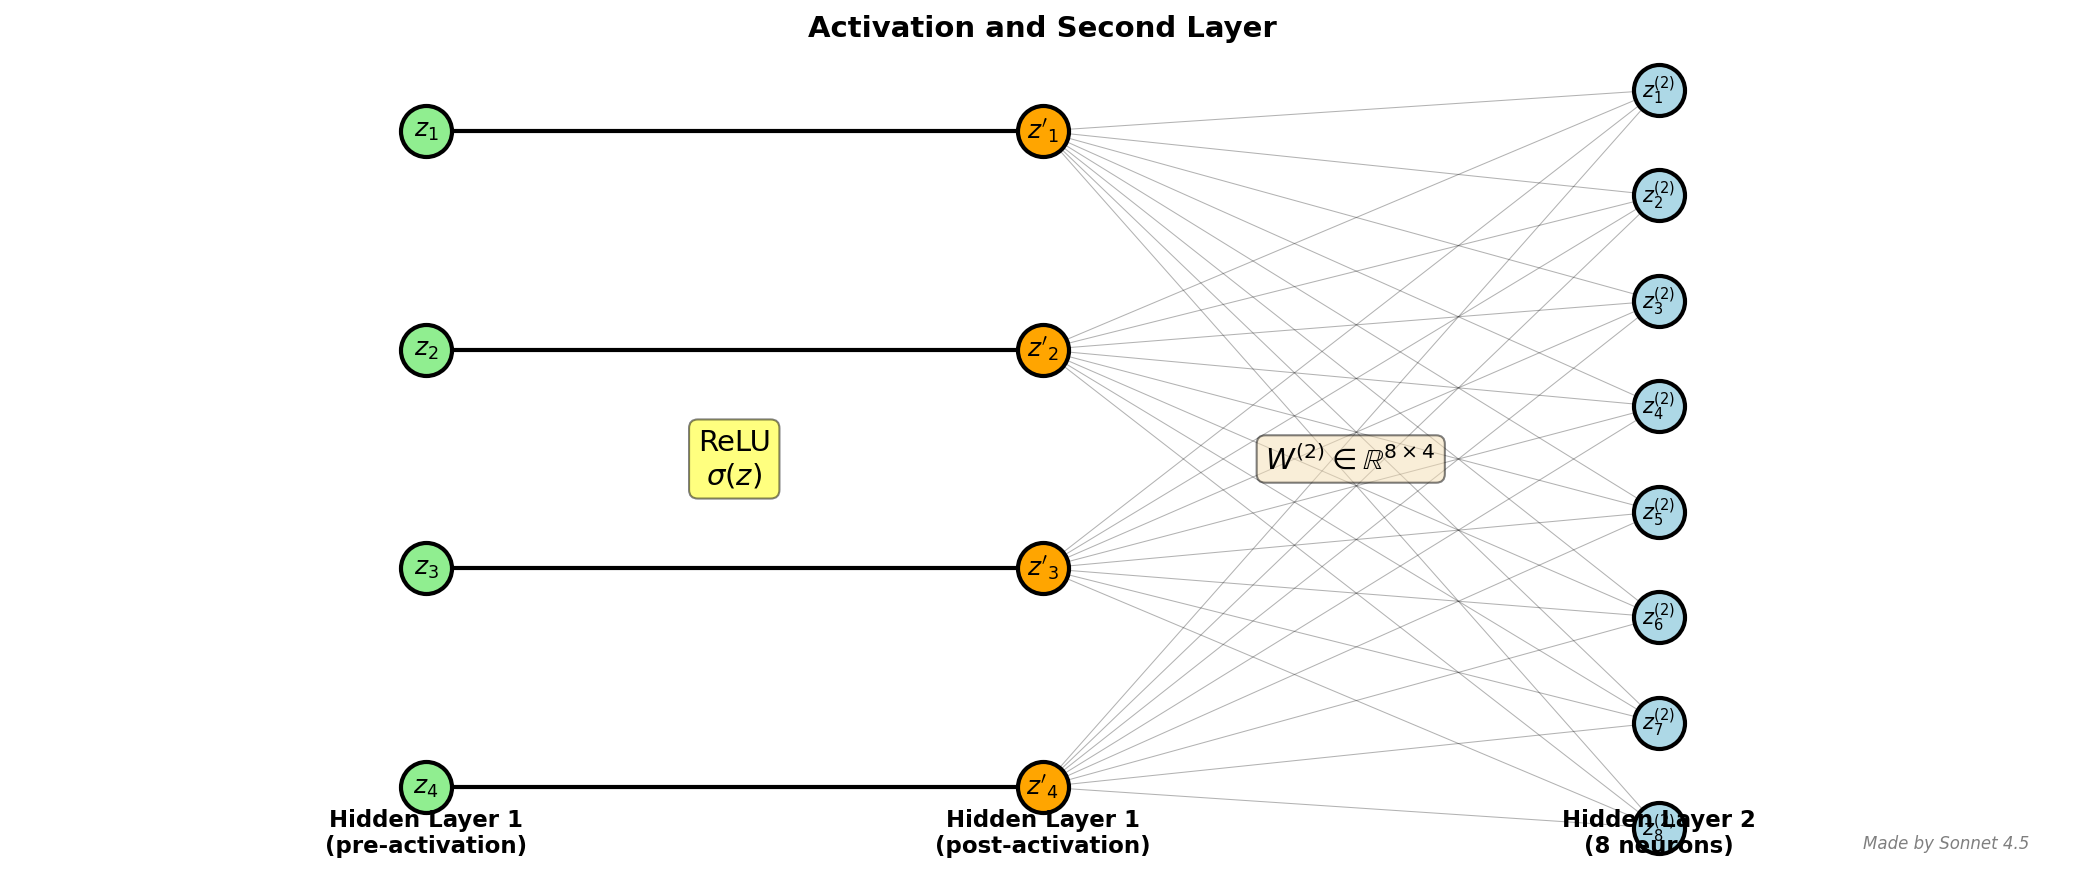

In [17]:
display(Image('plot2_activation_layer2.png'))

In [18]:
print(np.shape(a1))

(4,)


So we want to pass our $a$ vector, which is 4x1, in such a way that it outputs a 8x1 vector resulting from a linear combination and the nonlinear activation function.

$$
\begin{bmatrix} z_1^{(2)} \\ z_2^{(2)} \\ z_3^{(2)} \\ z_4^{(2)} \\ z_5^{(2)} \\ z_6^{(2)} \\ z_7^{(2)} \\ z_8^{(2)} \end{bmatrix} = \begin{bmatrix} 
w_{11}^{(2)} & w_{21}^{(2)} & w_{31}^{(2)} & w_{41}^{(2)} \\
w_{12}^{(2)} & w_{22}^{(2)} & w_{32}^{(2)} & w_{42}^{(2)} \\
w_{13}^{(2)} & w_{23}^{(2)} & w_{33}^{(2)} & w_{43}^{(2)} \\
w_{14}^{(2)} & w_{24}^{(2)} & w_{34}^{(2)} & w_{44}^{(2)} \\
w_{15}^{(2)} & w_{25}^{(2)} & w_{35}^{(2)} & w_{45}^{(2)} \\
w_{16}^{(2)} & w_{26}^{(2)} & w_{36}^{(2)} & w_{46}^{(2)} \\
w_{17}^{(2)} & w_{27}^{(2)} & w_{37}^{(2)} & w_{47}^{(2)} \\
w_{18}^{(2)} & w_{28}^{(2)} & w_{38}^{(2)} & w_{48}^{(2)}
\end{bmatrix} \begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ a_4 \end{bmatrix} + \begin{bmatrix} b_1^{(2)} \\ b_2^{(2)} \\ b_3^{(2)} \\ b_4^{(2)} \\ b_5^{(2)} \\ b_6^{(2)} \\ b_7^{(2)} \\ b_8^{(2)} \end{bmatrix}
$$

Or compactly:

$$
\mathbf{z}^{(2)} = \mathbf{W}^{(2)} \mathbf{a}^{(1)} + \mathbf{b}^{(2)}
$$

where $\mathbf{W}^{(2)} \in \mathbb{R}^{8 \times 4}$, transforming 4 inputs into 8 outputs.


We now have a pass of $z$ into 8 layers


In [19]:
W2 = np.random.randn(8,4)
b2 = np.random.randn(8)

**c)** Compute the intermediary `z2` and activation `a2` for the second layer.


In [ ]:
z2 = W2 @ a1 + b2   
a2 = ReLU(z2)


Confirm that you got the correct activation shape with the test below.


In [21]:
print(
    np.allclose(np.exp(len(a2)), 2980.9579870417283)
)  # This should evaluate to True if a2 has the correct shape :)

True


# Exercise 3

We often want our neural networks to have many layers of varying sizes. To avoid writing very long and error-prone code where we explicitly define and evaluate each layer we should keep all our layers in a single variable which is easy to create and use.

**a)** Complete the function below so that it returns a list `layers` of weight and bias tuples `(W, b)` for each layer, in order, with the correct shapes that we can use later as our network parameters.


In [22]:
def create_layers(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers


In [ ]:
#made by sonnet 4.5
def create_layers_visual(network_input_size, layer_output_sizes):
    layers = []
    
    print(f"Starting with input size: {network_input_size}\n")
    print("="*60)
    
    i_size = network_input_size
    for idx, layer_output_size in enumerate(layer_output_sizes, 1):
        print(f"\nLayer {idx}:")
        print(f"  Input size: {i_size} → Output size: {layer_output_size}")
        
        W = np.random.randn(layer_output_size, i_size)
        b = np.random.randn(layer_output_size)
        
        print(f"\n  np.shape(W_{idx}) = {W.shape}          np.shape(b_{idx}) = {b.shape}:")
        for i, row in enumerate(W):
            w_str = ' '.join(f'{x:7.3f}' for x in row)
            b_str = f'{b[i]:7.3f}'
            print(f"    [{w_str}]  +  [{b_str}]")
        
        layers.append((W, b))
        
        i_size = layer_output_size
        print(f"\n  → i_size = {i_size}")
        print("="*60)
    
    return layers

layers = create_layers_visual(2, [4, 8, 3])


Starting with input size: 2


Layer 1:
  Input size: 2 → Output size: 4

  np.shape(W_1) = (4, 2)          np.shape(b_1) = (4,):
    [ -0.539   0.927]  +  [  0.261]
    [  1.199   0.018]  +  [ -1.486]
    [  1.016  -1.184]  +  [  0.464]
    [  1.764  -0.768]  +  [  0.684]

  → i_size = 4

Layer 2:
  Input size: 4 → Output size: 8

  np.shape(W_2) = (8, 4)          np.shape(b_2) = (8,):
    [ -2.387  -0.007  -0.547   0.475]  +  [ -0.848]
    [ -1.531   1.923  -0.146  -0.303]  +  [ -0.546]
    [ -0.910   1.008   1.597  -1.290]  +  [  0.087]
    [ -0.508   0.932   0.495  -0.797]  +  [  0.104]
    [  0.249   0.996  -0.898   0.535]  +  [  0.690]
    [  1.082   0.093  -0.635   0.592]  +  [  0.471]
    [ -0.458   2.398  -1.004   0.325]  +  [ -1.611]
    [  1.399  -0.447  -1.227  -1.103]  +  [  1.128]

  → i_size = 8

Layer 3:
  Input size: 8 → Output size: 3

  np.shape(W_3) = (3, 8)          np.shape(b_3) = (3,):
    [ -0.705  -1.632   0.401  -0.145  -0.620  -0.505   0.919  -0.021]  +  [  1.

**b)** Comple the function below so that it evaluates the intermediary `z` and activation `a` for each layer, with ReLU actication, and returns the final activation `a`. This is the complete feed-forward pass, a full neural network!


So for our first layer we had $\ell = 1$


$$\mathbf{z}^{(1)} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}$$
$$\mathbf{a}^{(1)} = \sigma(\mathbf{z}^{(1)})$$

and layer 2: 
$$\mathbf{z}^{(2)} = \mathbf{W}^{(2)} \mathbf{a}^{(1)} + \mathbf{b}^{(2)}$$
$$\mathbf{a}^{(2)} = \sigma(\mathbf{z}^{(2)})$$

layer 3: 

$$\mathbf{z}^{(3)} = \mathbf{W}^{(3)} \mathbf{a}^{(2)} + \mathbf{b}^{(3)}$$
$$\mathbf{a}^{(3)} = \sigma(\mathbf{z}^{(3)})$$

so that 
$$\mathbf{z}^{(\ell)} = \mathbf{W}^{(\ell)} \mathbf{a}^{(\ell-1)} + \mathbf{b}^{(\ell)}$$
$$\mathbf{a}^{(\ell)} = \sigma(\mathbf{z}^{(\ell)})$$

where $\mathbf{a}^{(0)} = \mathbf{x}$ (input) and $\mathbf{a}^{(L)}$ is the final output.

In [24]:
def feed_forward_all_relu(layers, input):
    a = input
    for W, b in layers:
        z = W @ a + b
        a = ReLU(z)
    return a

**c)** Create a network with input size 8 and layers with output sizes 10, 16, 6, 2. Evaluate it and make sure that you get the correct size vectors along the way.


In [25]:
input_size = 8
layer_output_sizes = [10,16,6,2]

x = np.random.rand(input_size)
layers = create_layers(input_size, layer_output_sizes)
predict = feed_forward_all_relu(layers, x)

print(f"Input shape: {x.shape}")
print(f"Output shape: {predict.shape}")
print(f"Output: {predict}")

Input shape: (8,)
Output shape: (2,)
Output: [11.23546089  0.        ]


**d)** Why is a neural network with no activation functions always mathematically equivelent to a neural network with only one layer?


Without activation functions, each layer is just a linear transformation:

$$\mathbf{z}^{(1)} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}$$
$$\mathbf{z}^{(2)} = \mathbf{W}^{(2)} \mathbf{z}^{(1)} + \mathbf{b}^{(2)}$$
$$\mathbf{z}^{(3)} = \mathbf{W}^{(3)} \mathbf{z}^{(2)} + \mathbf{b}^{(3)}$$

Passing layer 1 into layer 2:
$$\mathbf{z}^{(2)} = \mathbf{W}^{(2)} (\mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}) + \mathbf{b}^{(2)} = \mathbf{W}^{(2)}\mathbf{W}^{(1)} \mathbf{x} + \mathbf{W}^{(2)}\mathbf{b}^{(1)} + \mathbf{b}^{(2)}$$

and layer 2 into layer 3:
$$\mathbf{z}^{(3)} = \mathbf{W}^{(3)} \mathbf{z}^{(2)} + \mathbf{b}^{(3)}$$
$$= \mathbf{W}^{(3)} (\mathbf{W}^{(2)}\mathbf{W}^{(1)} \mathbf{x} + \mathbf{W}^{(2)}\mathbf{b}^{(1)} + \mathbf{b}^{(2)}) + \mathbf{b}^{(3)}$$
$$= \mathbf{W}^{(3)}\mathbf{W}^{(2)}\mathbf{W}^{(1)} \mathbf{x} + \mathbf{W}^{(3)}\mathbf{W}^{(2)}\mathbf{b}^{(1)} + \mathbf{W}^{(3)}\mathbf{b}^{(2)} + \mathbf{b}^{(3)}$$
and so on. 

Compactly, we can write this as


$$\mathbf{z}^{(3)} = \mathbf{W}^* \mathbf{x} + \mathbf{b}^*$$

where $\mathbf{W}^* = \mathbf{W}^{(3)}\mathbf{W}^{(2)}\mathbf{W}^{(1)}$ and $\mathbf{b}^* = \mathbf{W}^{(3)}\mathbf{W}^{(2)}\mathbf{b}^{(1)} + \mathbf{W}^{(3)}\mathbf{b}^{(2)} + \mathbf{b}^{(3)}$.

and for any layer $\ell$:

$$\mathbf{z}^{(\ell)} = \mathbf{W}^* \mathbf{x} + \mathbf{b}^*$$

where $\mathbf{W}^* = \prod_{i=\ell}^{1} \mathbf{W}^{(i)} = \mathbf{W}^{(\ell)}\mathbf{W}^{(\ell-1)} \cdots \mathbf{W}^{(1)}$.

and since a single-layer is equivalent to any linear function containing a single weight matrix and bias vector, and any composition of a linear function is a linear function, an $\ell$-layered neural network without activation functions is simply a single-layer neural network. 


# Exercise 4 - Custom activation for each layer


So far, every layer has used the same activation, ReLU. We often want to use other types of activation however, so we need to update our code to support multiple types of activation functions. Make sure that you have completed every previous exercise before trying this one.


**a)** Complete the `feed_forward` function which accepts a list of activation functions as an argument, and which evaluates these activation functions at each layer.


In [26]:
def feed_forward(input, layers, activation_funcs):
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = W @ a + b
        a = activation_func(z)
    return a


**b)** You are now given a list with three activation functions, two ReLU and one sigmoid. (Don't call them yet! you can make a list with function names as elements, and then call these elements of the list later. If you add other functions than the ones defined at the start of the notebook, make sure everything is defined using autograd's numpy wrapper, like above, since we want to use automatic differentiation on all of these functions later.)

Evaluate a network with three layers and these activation functions.


In [27]:
network_input_size = 8
layer_output_sizes = [10, 16, 2]
activation_funcs = [ReLU, ReLU, sigmoid]
layers = create_layers(network_input_size, layer_output_sizes)

x = np.random.randn(network_input_size)
output = feed_forward(x, layers, activation_funcs)

print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print(f"Output: {output}")

Input shape: (8,)
Output shape: (2,)
Output: [0.01231254 0.00279202]


**c)** How does the output of the network change if you use sigmoid in the hidden layers and ReLU in the output layer?

In [28]:
activation_funcs_alt = [sigmoid, sigmoid, ReLU]
output_alt = feed_forward(x, layers, activation_funcs_alt)

print(f"Original output (ReLU, ReLU, sigmoid): {output}")
print(f"Alternative output (sigmoid, sigmoid, ReLU): {output_alt}")


Original output (ReLU, ReLU, sigmoid): [0.01231254 0.00279202]
Alternative output (sigmoid, sigmoid, ReLU): [0.         0.86423082]


We know that the ReLU is given as

$$\text{ReLU}(z) = \max(0, z) = \begin{cases} z & \text{if } z > 0 \\ 0 & \text{if } z \leq 0 \end{cases}$$

and the sigmoid as

$$\sigma(z) = \frac{1}{1 + e^{-z}},$$

looking at ranges of these functions, ReLU can give $[0, \infty)$ whereas the sigmoid $(0, 1)$. If you put sigmoids in the hidden layers, the intermediate activations $\mathbf{a}^{(\ell)}$ are bounded in $(0, 1)$. As they are passed into new weights, they will atleast be bounded by the order of magnititude of those weights. This in restricts the range of the coming pre-activations $\mathbf{z}^{(\ell+1)}$, lowering magnititudes throughout the network 

In contrast, ReLU activations in hidden layers can grow arbitrarily large.

# Exercise 5 - Processing multiple inputs at once


So far, the feed forward function has taken one input vector as an input. This vector then undergoes a linear transformation and then an element-wise non-linear operation for each layer. This approach of sending one vector in at a time is great for interpreting how the network transforms data with its linear and non-linear operations, but not the best for numerical efficiency. Now, we want to be able to send many inputs through the network at once. This will make the code a bit harder to understand, but it will make it faster, and more compact. It will be worth the trouble.

To process multiple inputs at once, while still performing the same operations, you will only need to flip a couple things around.


**a)** Complete the function `create_layers_batch` so that the weight matrix is the transpose of what it was when you only sent in one input at a time.


In [29]:
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(i_size, layer_output_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers


**b)** Make a matrix of inputs with the shape (number of features, number of inputs), you choose the number of inputs and features per input. Then complete the function `feed_forward_batch` so that you can process this matrix of inputs with only one matrix multiplication and one broadcasted vector addition per layer. (Hint: You will only need to swap two variable around from your previous implementation, but remember to test that you get the same results for equivelent inputs!)


In [30]:
inputs = np.random.randn(1000, 4)  # (number of inputs, number of features)

def feed_forward_batch(inputs, layers, activation_funcs):
    a = inputs
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = a @ W + b  # Matrix multiplication: (n_samples, n_features) @ (n_features, n_outputs)
        a = activation_func(z)
    return a

In [31]:
layers_batch = create_layers_batch(4, [8, 16, 2])
activation_funcs = [ReLU, ReLU, sigmoid]

inputs = np.random.randn(1000, 4)
outputs = feed_forward_batch(inputs, layers_batch, activation_funcs)
print(f"Input shape: {inputs.shape}")   # (1000, 4)
print(f"Output shape: {outputs.shape}") # (1000, 2)

Input shape: (1000, 4)
Output shape: (1000, 2)


**c)** Create and evaluate a neural network with 4 inputs and layers with output sizes 12, 10, 3 and activations ReLU, ReLU, softmax.


In [ ]:
network_input_size = 4
layer_output_sizes = [12, 10, 3]
activation_funcs = [ReLU, ReLU, softmax]
layers = create_layers_batch(network_input_size, layer_output_sizes)

inputs = np.random.randn(100, network_input_size)
outputs = feed_forward_batch(inputs, layers, activation_funcs)

print(f"Input shape: {inputs.shape}")
print(f"Output shape: {outputs.shape}")
print(f"Sample output (first row): {outputs[0]}")
print(f"Sum of first row: {np.sum(outputs[0])}")

Input shape: (100, 4)
Output shape: (100, 3)
Sample output (first row): [2.06387652e-01 5.56530679e-05 7.93556695e-01]
Sum of first row: 1.0


You should use this batched approach moving forward, as it will lead to much more compact code. However, remember that each input is still treated separately, and that you will need to keep in mind the transposed weight matrix and other details when implementing backpropagation.


# Exercise 6 - Predicting on real data


You will now evaluate your neural network on the iris data set (https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html).

This dataset contains data on 150 flowers of 3 different types which can be separated pretty well using the four features given for each flower, which includes the width and length of their leaves. You are will later train your network to actually make good predictions.


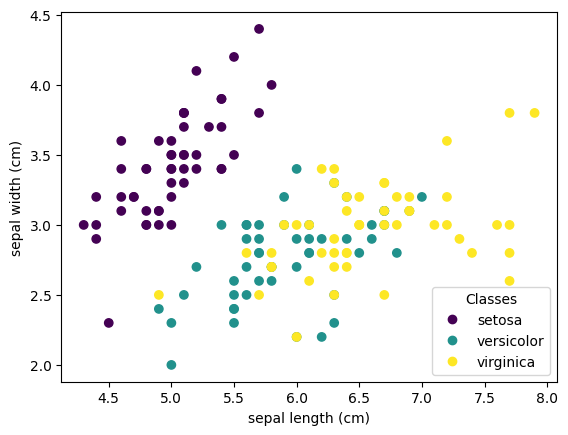

In [33]:
iris = datasets.load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [ ]:
inputs = iris.data

# each prediction is a vector with a score for each of the three types of flowers,
# we need to make each target a vector with a 1 for the correct flower and a 0 for the others, softmax
targets = np.zeros((len(iris.data), 3))
for i, t in enumerate(iris.target):
    targets[i, t] = 1


def accuracy(predictions, targets):
    one_hot_predictions = np.zeros(predictions.shape)

    for i, prediction in enumerate(predictions):
        one_hot_predictions[i, np.argmax(prediction)] = 1
    return accuracy_score(one_hot_predictions, targets)

**a)** What should the input size for the network be with this dataset? What should the output size of the last layer be?


**b)** Create a network with two hidden layers, the first with sigmoid activation and the last with softmax, the first layer should have 8 "nodes", the second has the number of nodes you found in exercise a). Softmax returns a "probability distribution", in the sense that the numbers in the output are positive and add up to 1 and, their magnitude are in some sense relative to their magnitude before going through the softmax function. Remember to use the batched version of the create_layers and feed forward functions.


In [35]:
network_input_size = 4  # 4 features
layer_output_sizes = [12, 10, 3]  # Hidden layers, then 3 output classes
activation_funcs = [ReLU, ReLU, softmax]  # softmax in output for probabilities

layers = create_layers_batch(network_input_size, layer_output_sizes)
predictions = feed_forward_batch(inputs, layers, activation_funcs)

print(f"Input shape: {inputs.shape}")      # (150, 4)
print(f"Predictions shape: {predictions.shape}")  # (150, 3)
print(f"Sample prediction: {predictions[0]}")  # [prob_class0, prob_class1, prob_class2]
print(f"Sum: {predictions[0].sum()}")  # ~1.0

Input shape: (150, 4)
Predictions shape: (150, 3)
Sample prediction: [0.09429077 0.39635136 0.50935787]
Sum: 1.0


**c)** Evaluate your model on the entire iris dataset! For later purposes, we will split the data into train and test sets, and compute gradients on smaller batches of the training data. But for now, evaluate the network on the whole thing at once.


In [36]:
predictions = feed_forward_batch(inputs, layers, activation_funcs)

**d)** Compute the accuracy of your model using the accuracy function defined above. Recreate your model a couple times and see how the accuracy changes.


In [37]:
print(accuracy(predictions, targets))

0.3466666666666667


In [38]:
network_input_size = 4  # 4 features
layer_output_sizes = [12, 10, 3]  # Hidden layers, then 3 output classes
activation_funcs = [sigmoid, ReLU, softmax]  # softmax in output for probabilities

layers = create_layers_batch(network_input_size, layer_output_sizes)
predictions = feed_forward_batch(inputs, layers, activation_funcs)
print(accuracy(predictions, targets))

0.34


In [39]:
network_input_size = 4  # 4 features
layer_output_sizes = [12, 10, 3]  # Hidden layers, then 3 output classes
activation_funcs = [sigmoid, sigmoid, softmax]  # softmax in output for probabilities

layers = create_layers_batch(network_input_size, layer_output_sizes)
predictions = feed_forward_batch(inputs, layers, activation_funcs)
print(accuracy(predictions, targets))

0.6666666666666666


In [40]:
network_input_size = 4  # 4 features
layer_output_sizes = [12, 10, 3]  # Hidden layers, then 3 output classes
activation_funcs = [ReLU, sigmoid, softmax]  # softmax in output for probabilities

layers = create_layers_batch(network_input_size, layer_output_sizes)
predictions = feed_forward_batch(inputs, layers, activation_funcs)
print(accuracy(predictions, targets))

0.30666666666666664


# Exercise 7 - Training on real data (Optional)

To be able to actually do anything useful with your neural network, you need to train it. For this, we need a cost function and a way to take the gradient of the cost function wrt. the network parameters. The following exercises guide you through taking the gradient using autograd, and updating the network parameters using the gradient. Feel free to implement gradient methods like ADAM if you finish everything.


Since we are doing a classification task with multiple output classes, we use the cross-entropy loss function, which can evaluate performance on classification tasks. It sees if your prediction is "most certain" on the correct target.


In [41]:
def cross_entropy(predict, target):
    return np.sum(-target * np.log(predict))


def cost(input, layers, activation_funcs, target):
    predict = feed_forward_batch(input, layers, activation_funcs)
    return cross_entropy(predict, target)

To improve our network on whatever prediction task we have given it, we need to use a sensible cost function, take the gradient of that cost function with respect to our network parameters, the weights and biases, and then update the weights and biases using these gradients. To clarify, we need to find and use these

$$
\frac{\partial C}{\partial W}, \frac{\partial C}{\partial b}
$$


Now we need to compute these gradients. This is pretty hard to do for a neural network, we will use most of next week to do this, but we can also use autograd to just do it for us, which is what we always do in practice. With the code cell below, we create a function which takes all of these gradients for us.


In [42]:
from autograd import grad


gradient_func = grad(
    cost, 1
)  # Taking the gradient wrt. the second input to the cost function, i.e. the layers

**a)** What shape should the gradient of the cost function wrt. weights and biases be?

**b)** Use the `gradient_func` function to take the gradient of the cross entropy wrt. the weights and biases of the network. Check the shapes of what's inside. What does the `grad` func from autograd actually do?


In [43]:
layers_grad = gradient_func(
    inputs, layers, activation_funcs, targets
)  # Don't change this

**c)** Finish the `train_network` function.


In [44]:
def train_network(
    inputs, layers, activation_funcs, targets, learning_rate=0.001, epochs=100
):
    for i in range(epochs):
        layers_grad = gradient_func(inputs, layers, activation_funcs, targets)
        for (W, b), (W_g, b_g) in zip(layers, layers_grad):
            W -= learning_rate * W_g
            b -= learning_rate * b_g

**e)** What do we call the gradient method used above?


This is called batch gradient descent.

**d)** Train your network and see how the accuracy changes! Make a plot if you want.


In [45]:
import autograd.numpy as np  #got an error with np.exp 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [46]:
np.random.seed(314)
network_input_size = 4
layer_output_sizes = [12, 10, 3]
activation_funcs = [ReLU, sigmoid, softmax]

layers = create_layers_batch(network_input_size, layer_output_sizes)

predictions = feed_forward_batch(inputs, layers, activation_funcs)
initial_acc = accuracy(predictions, targets)
print(f"Initial accuracy: {initial_acc:.4f}")

train_network(inputs, layers, activation_funcs, targets)
predictions = feed_forward_batch(inputs, layers, activation_funcs)
final_acc = accuracy(predictions, targets)
print(f"Final accuracy: {final_acc:.4f}")


Initial accuracy: 0.2000
Final accuracy: 0.8400


**e)** How high of an accuracy is it possible to acheive with a neural network on this dataset, if we use the whole thing as training data?
